In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df = pd.read_csv("C:\LCIT\SEMESTER_1\AISC1006_SP\Fraud.csv")

In [3]:
#Shape of dataset
df.shape

(6362620, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
#data types
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
#Summary Statistics
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


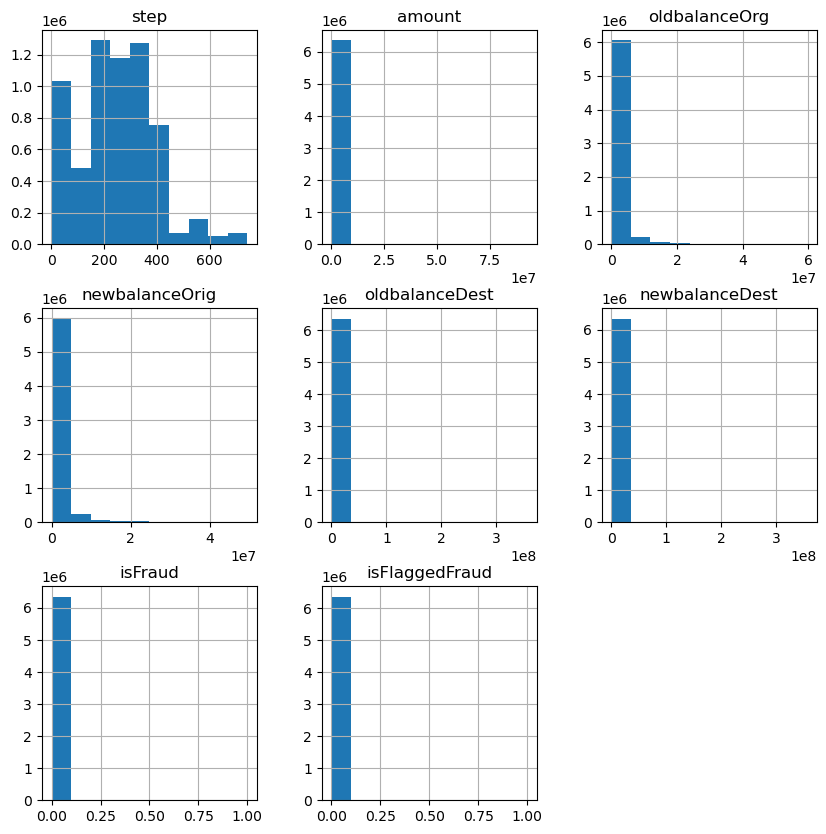

In [8]:
#Histrograms
df.hist(figsize=(10, 10))
plt.show()

In [9]:
#Checking noise in dependent parameters
dataUnq=[df.isFraud.unique(), df.isFlaggedFraud.unique()]
dataUnq

[array([0, 1], dtype=int64), array([0, 1], dtype=int64)]

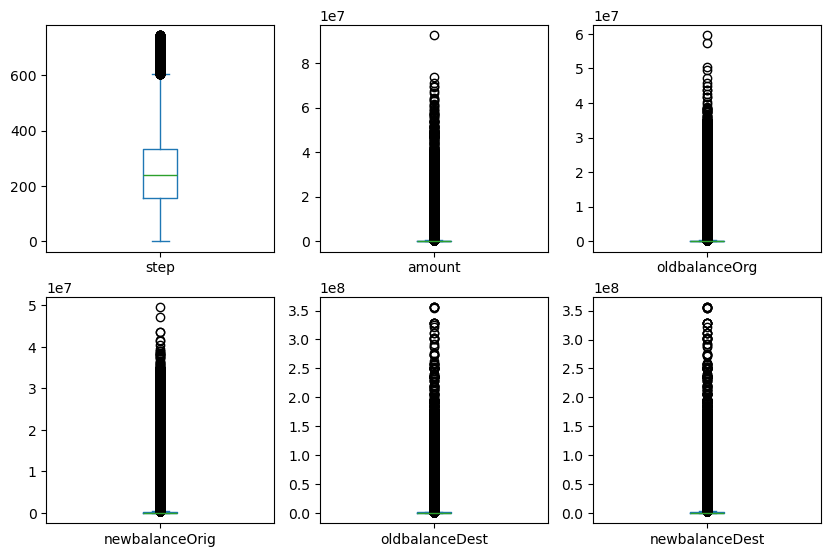

In [10]:
#Box Plots to find outliers
dataNum=df[['step','amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest']]
dataNum.plot(kind='box', subplots=True, layout =(3,3), sharex=False, sharey=False, figsize=(10,10))
plt.show()

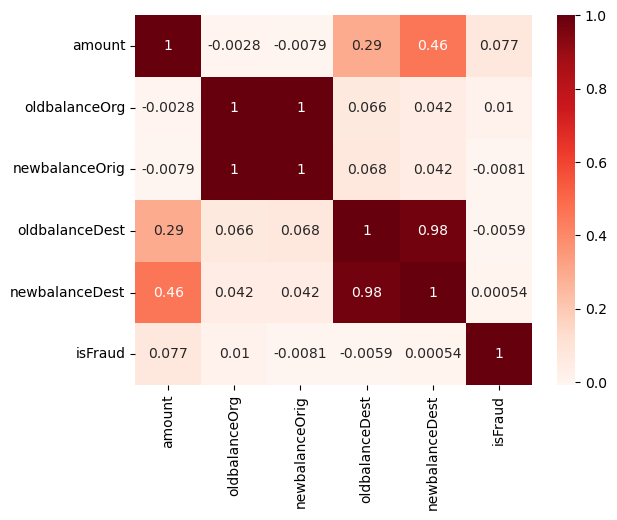

In [11]:
#Coorelation matrix
corr_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.show()

In [28]:
#Data Splitting 60,20,20
from sklearn.model_selection import train_test_split

#Split data into train and temp sets(test_size=0.4, means 40% of data to test, 60% to train)
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)

# Then split temp into validation and test(test_size=0.5, half of temp data, means 20% for val, test each)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

#Check Shapes
print("Train dataset shape:",train_data.shape)
print("validation dataset shape:",validation_data.shape)
print("Test dataset shape:",test_data.shape)


Train dataset shape: (3817572, 11)
validation dataset shape: (1272524, 11)
Test dataset shape: (1272524, 11)


In [30]:
#Data Preprocessing